# Imports

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load Datasets

In [27]:
from pathlib import Path
data_dir = Path('../../data')

images_dir = Path('../images')

## All Stels

In [28]:
# fname_stels = '../data/1_dataset/first_dataset.csv'
# df_stels = pd.read_csv(fname_stels)

# print("Shape of the dataset:")
# print(df_gstels.shape)

## Good Stels

In [29]:
fname_gstels = data_dir / 'GStels/GStels.csv'
df_gstels = pd.read_csv(fname_gstels)

print("Shape of the dataset: ", df_gstels.shape)

Shape of the dataset:  (1970269, 20)


## Extra Good Stels (one's that can be ploted for r=0.1)

In [30]:
fname_xgstels = data_dir / 'XGStels/XGstels.csv'
df_xgstels = pd.read_csv(fname_xgstels)

print("Shape of the dataset: ", df_xgstels.shape)

Shape of the dataset:  (245028, 20)


# Check how many GStels and XGStels have min_r0 > 0.1

### GStels

In [31]:
number_of_gstels_r_sing_above_01 = df_gstels[df_gstels['r_singularity'] >= 0.1].shape[0]
print("Number of GStels with r_sginularity >= 0.1: ", number_of_gstels_r_sing_above_01)
print("Percentage of GStels with r_singularity >= 0.1: ", number_of_gstels_r_sing_above_01/df_gstels.shape[0] * 100)

Number of GStels with r_sginularity >= 0.1:  1365944
Percentage of GStels with r_singularity >= 0.1:  69.32779229638186


### XGStels

In [32]:
number_of_xgstels_r_sing_above_01 = df_xgstels[df_xgstels['r_singularity'] >= 0.1].shape[0]
print("Number of XGStels with r_sginularity >= 0.1: ", number_of_xgstels_r_sing_above_01)
print("Percentage of XGStels with r_singularity >= 0.1: ", number_of_xgstels_r_sing_above_01/df_xgstels.shape[0] * 100)

Number of XGStels with r_sginularity >= 0.1:  149623
Percentage of XGStels with r_singularity >= 0.1:  61.06363354392151


### Percentage of GStels with r_singularity > 0.1 that could be plotted (XGStels)

In [33]:
print("Percentage: ", number_of_xgstels_r_sing_above_01 / number_of_gstels_r_sing_above_01 * 100)

Percentage:  10.953816554705025


# Histograms

/var/folders/rx/n6c_f5ms1sz_256kqrv5wwrm0000gn/T/ipykernel_18688/1317363468.py:55: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(file)
/var/folders/rx/n6c_f5ms1sz_256kqrv5wwrm0000gn/T/ipykernel_18688/1317363468.py:55: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(file)
/var/folders/rx/n6c_f5ms1sz_256kqrv5wwrm0000gn/T/ipykernel_18688/1317363468.py:55: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(file)
/Users/pedrocurvo/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:170: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "or

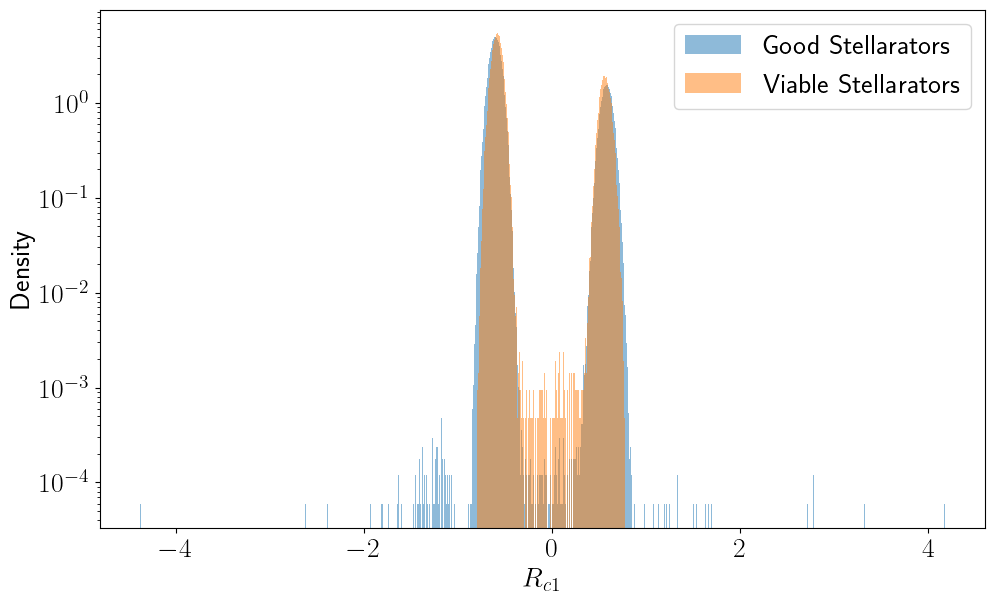

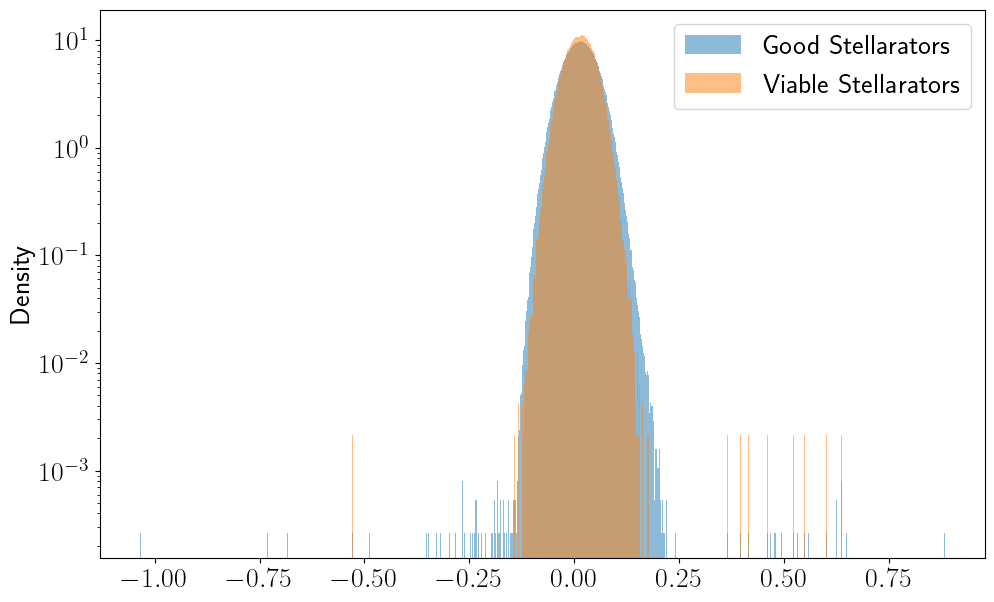

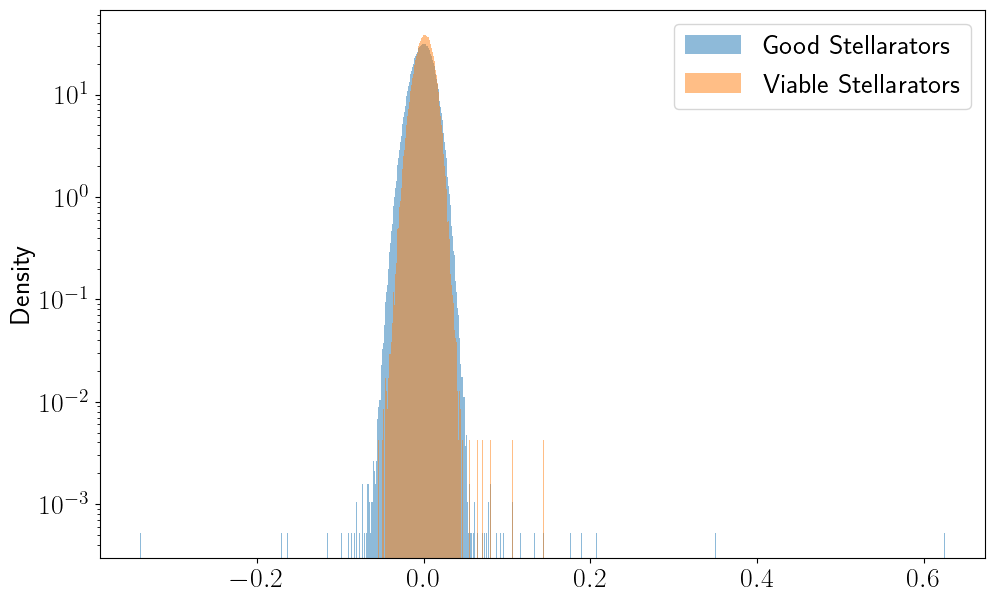

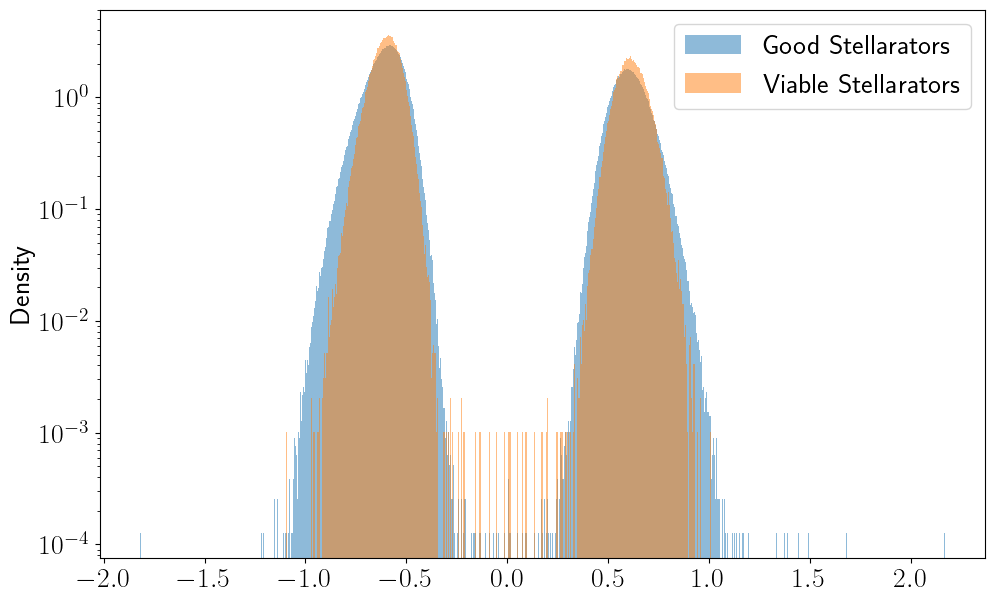

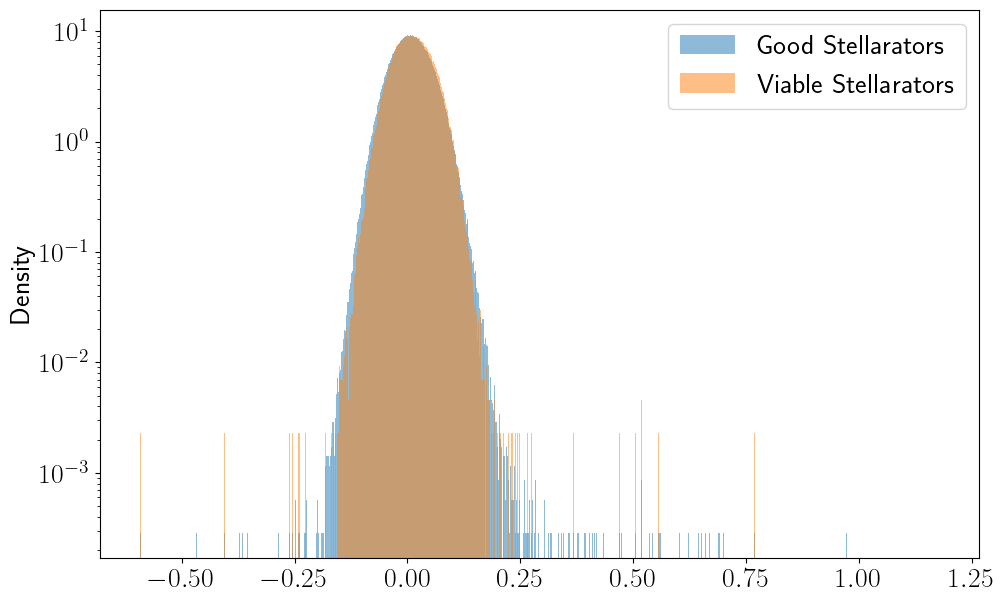

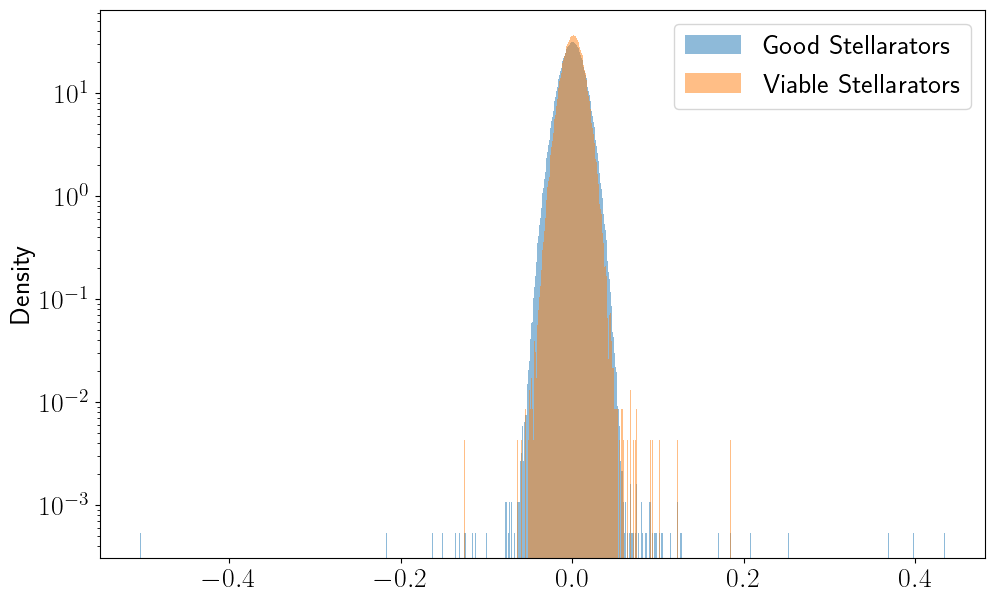

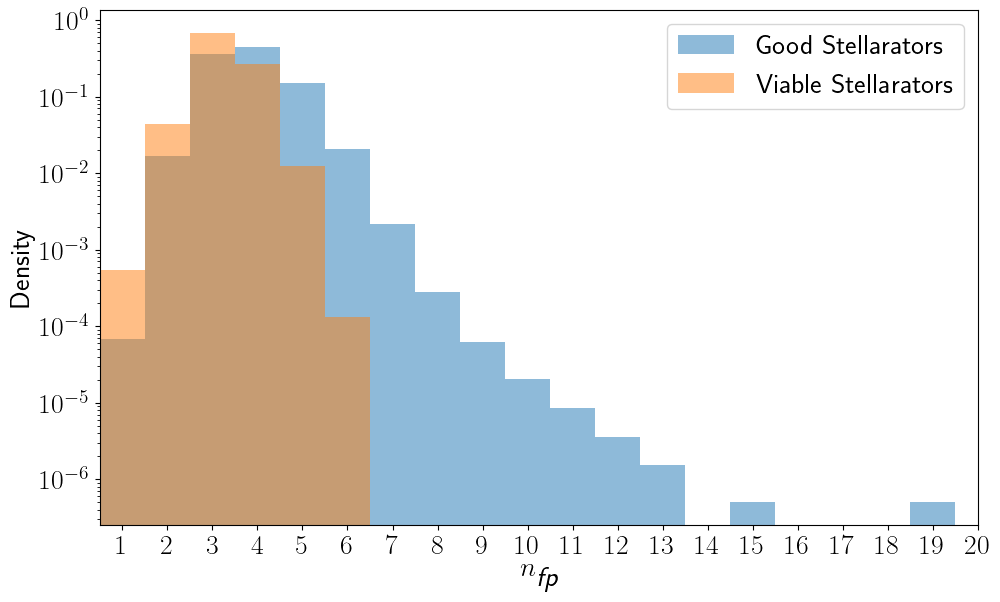

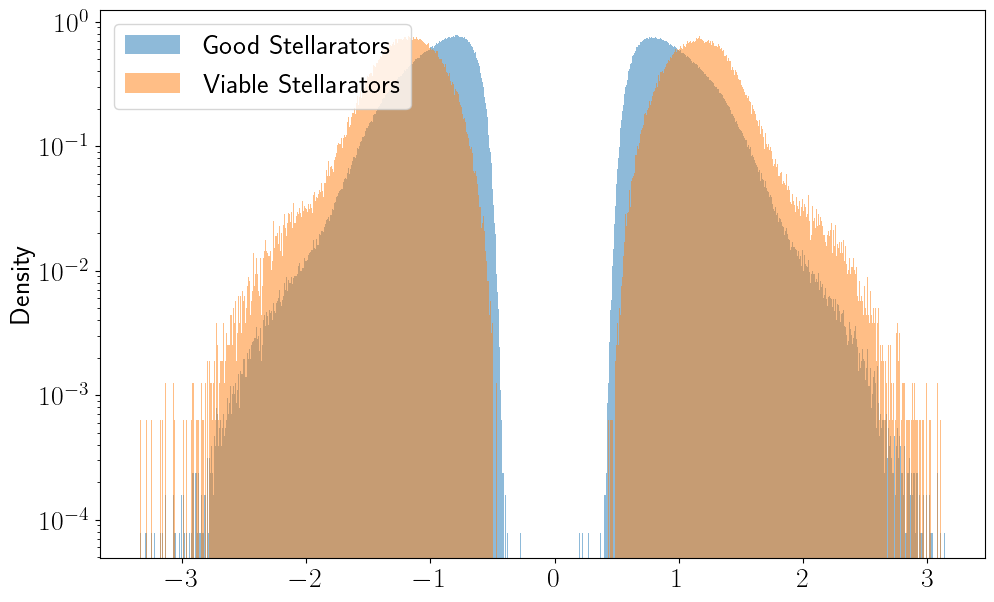

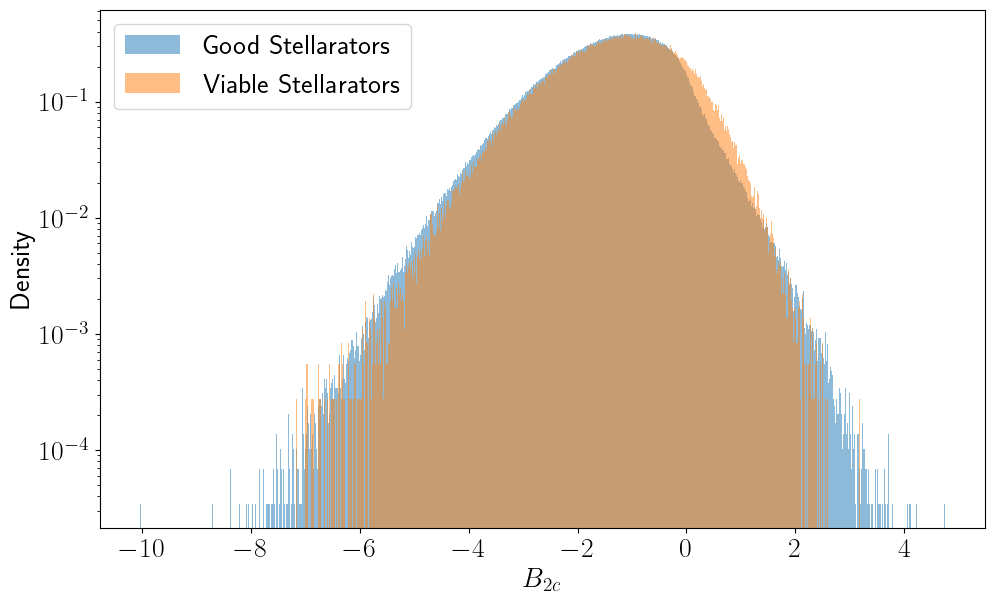

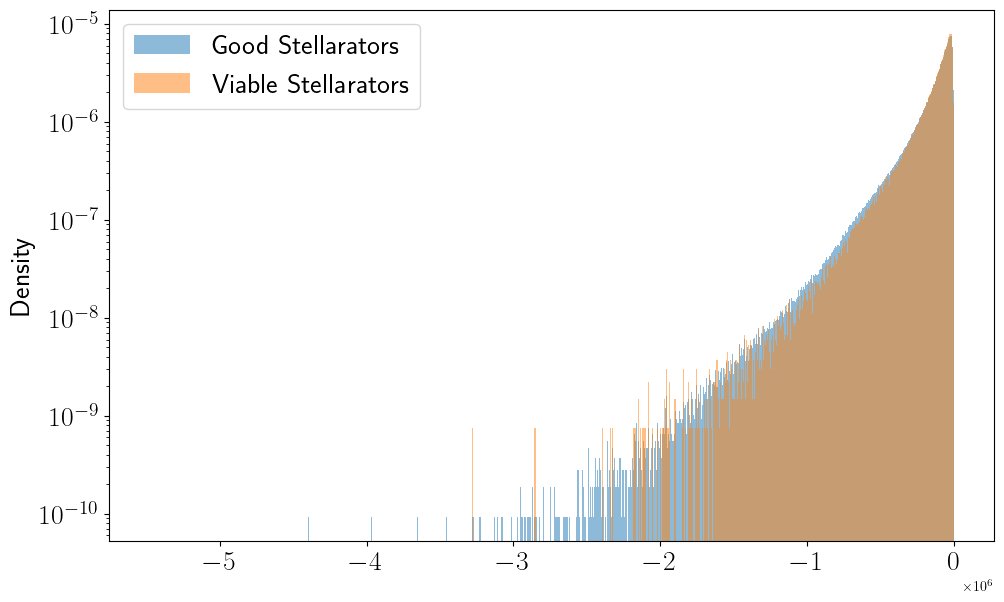

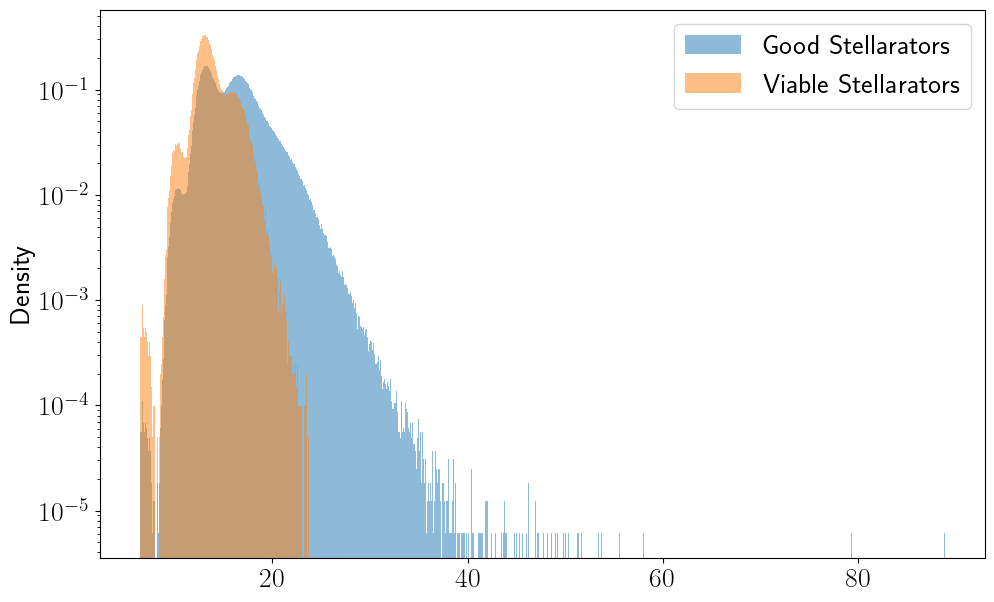

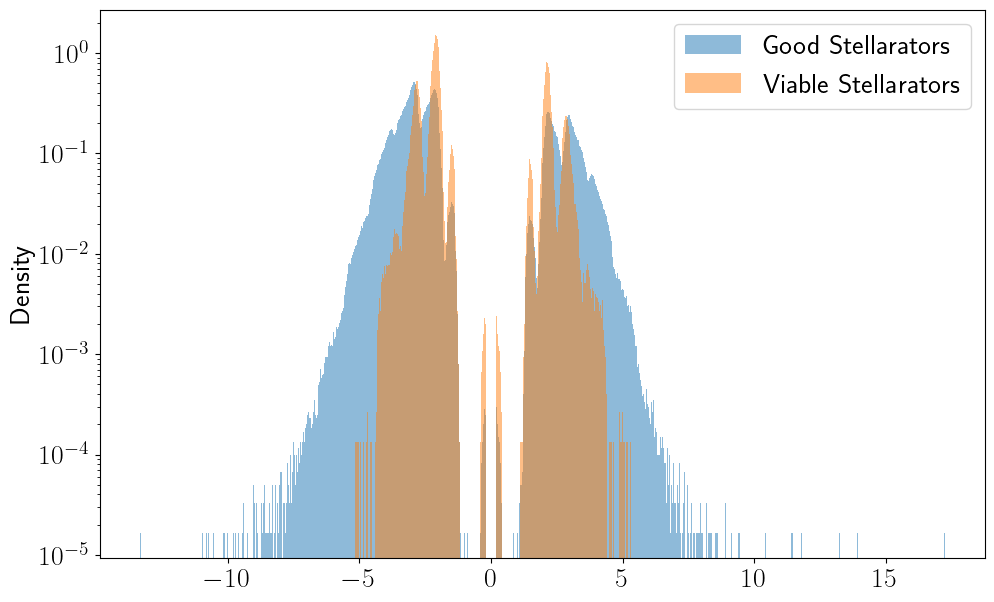

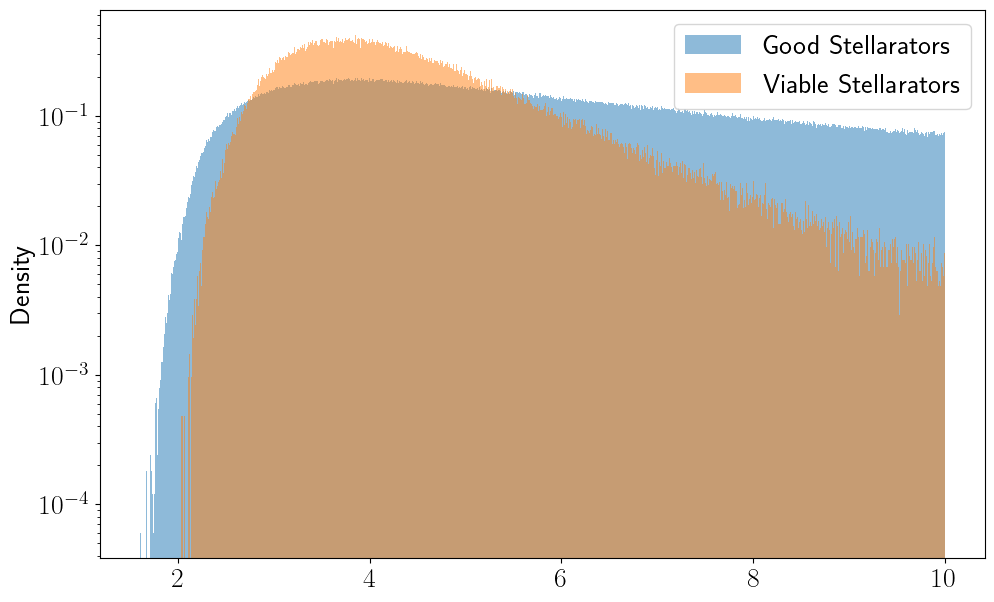

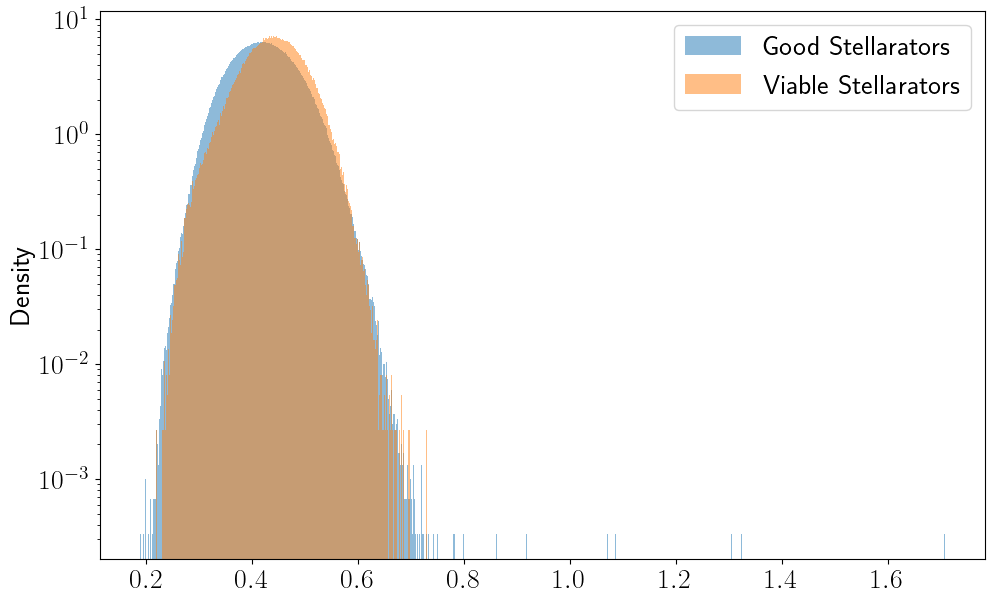

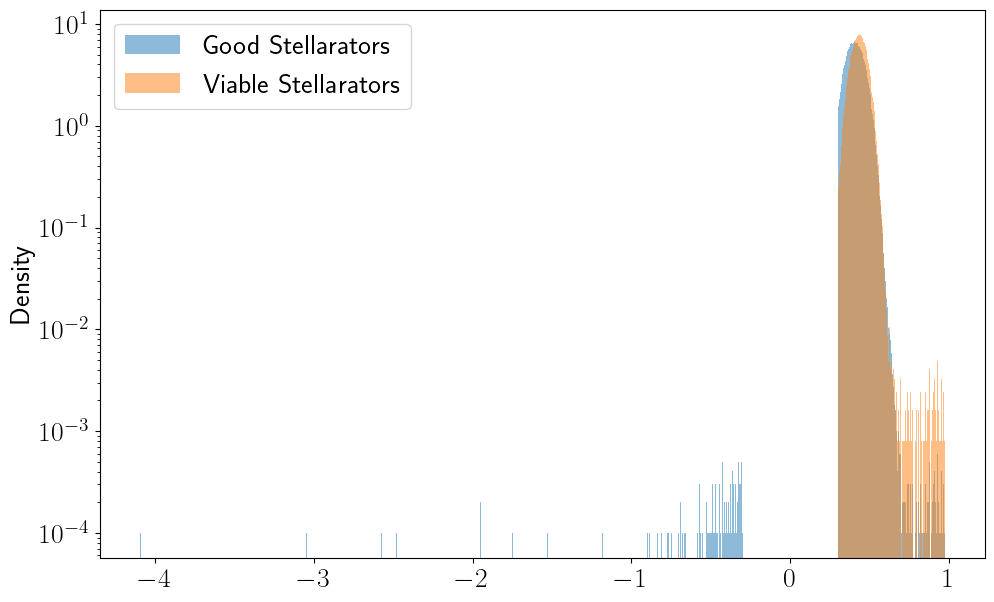

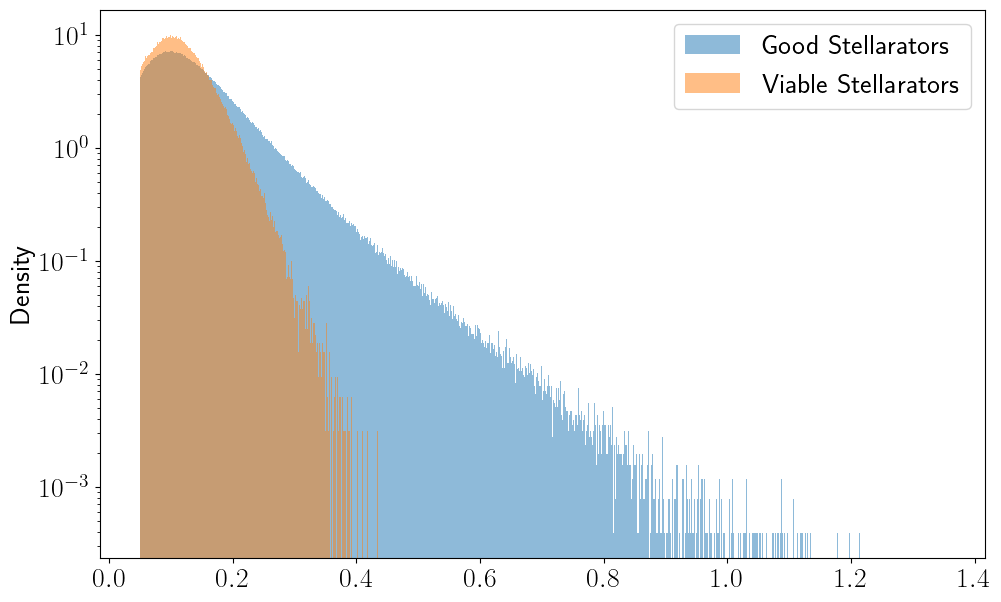

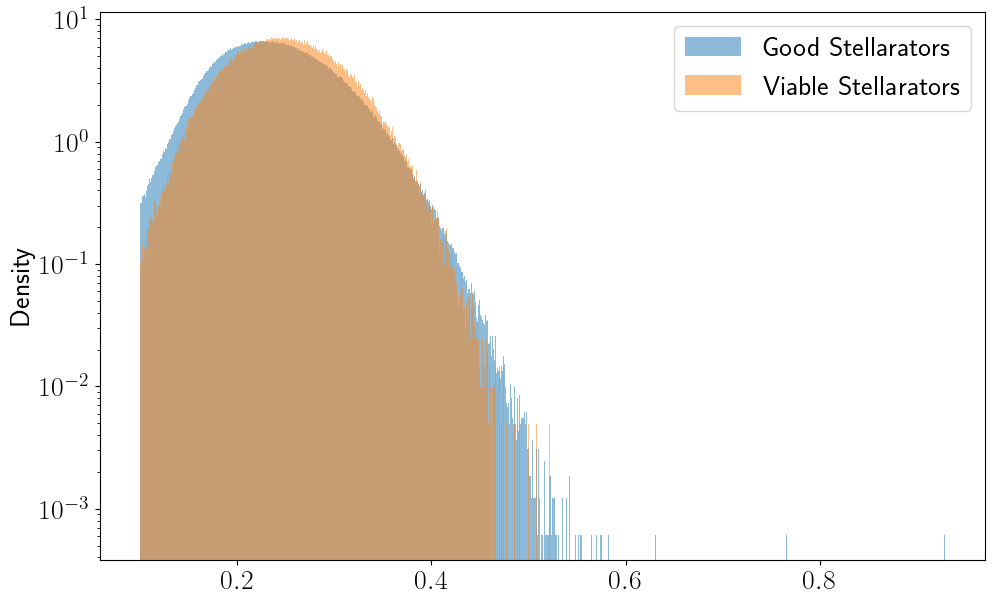

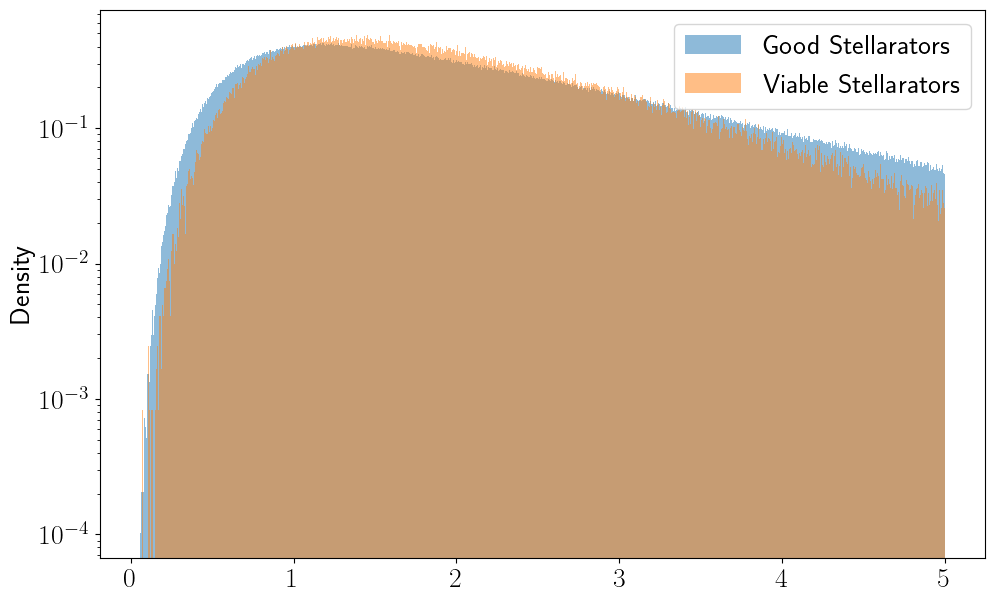

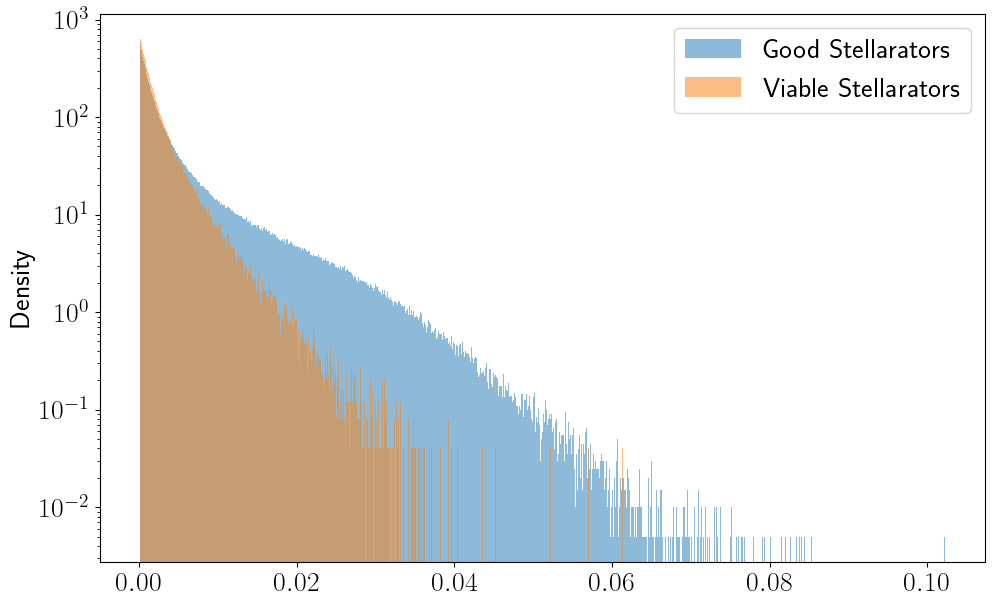

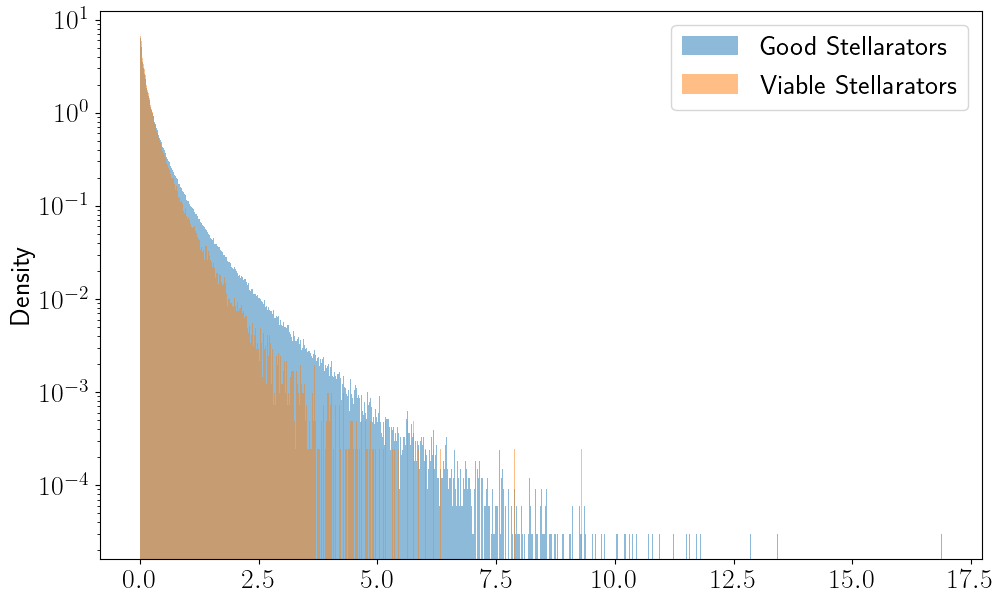

In [34]:
# Enable LaTeX rendering
import matplotlib
matplotlib.rcParams['text.usetex'] = True



for col in df_gstels.columns:
    values_gstels = df_gstels[col].values
    values_xgstels = df_xgstels[col].values


    
    if col in ['nfp']:
        vmin = np.min(values_gstels) - 0.5
        vmax = np.max(values_gstels) + 0.5
        num = int(round(vmax - vmin + 1))
    
    else:
        vmin = np.min(values_gstels)
        vmax = np.max(values_gstels)
        num = 1001
    
    bins = np.linspace(vmin, vmax, num=num)

    plt.figure(figsize=(10, 6))

    plt.hist(values_gstels, bins, density=True, alpha=0.5, label=r'Good Stellarators', log=True)
    plt.hist(values_xgstels, bins, density=True, alpha=0.5, label=r'Viable Stellarators', log=True)

    # X label with col name in latex 
    labels = {
        'nfp': r'$n_{\textit{fp}}$',
        'rc1': r'$R_{c1}$',
        'B2c': r'$B_{2c}$'
    }

    plt.xlabel(labels.get(col), fontsize=20)

    

    # If col nfp then set xticks to integers startin in 1 and ending in the maximum value of nfp and put the ticks in the middle of the bins
    if col in ['nfp']:
        plt.xticks(np.arange(1, vmax + 1, 1))
        plt.xlim(vmin, vmax + 0.5)

    plt.tight_layout()
    plt.gcf().subplots_adjust(left=0.10)
    plt.ylabel('Density', fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    # Change the font size of x and y labels
    plt.legend(fontsize=20)
    file = images_dir / 'visual_metrics_data' / 'histograms' / f'{col}.pdf'
    plt.savefig(file)
    plt.show()
    plt.close()


# Correlation Matrices

In [35]:
import seaborn as sns 

/var/folders/rx/n6c_f5ms1sz_256kqrv5wwrm0000gn/T/ipykernel_18688/2703956224.py:34: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(file)
/var/folders/rx/n6c_f5ms1sz_256kqrv5wwrm0000gn/T/ipykernel_18688/2703956224.py:34: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(file)
/var/folders/rx/n6c_f5ms1sz_256kqrv5wwrm0000gn/T/ipykernel_18688/2703956224.py:34: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(file)
/Users/pedrocurvo/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:170: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "or

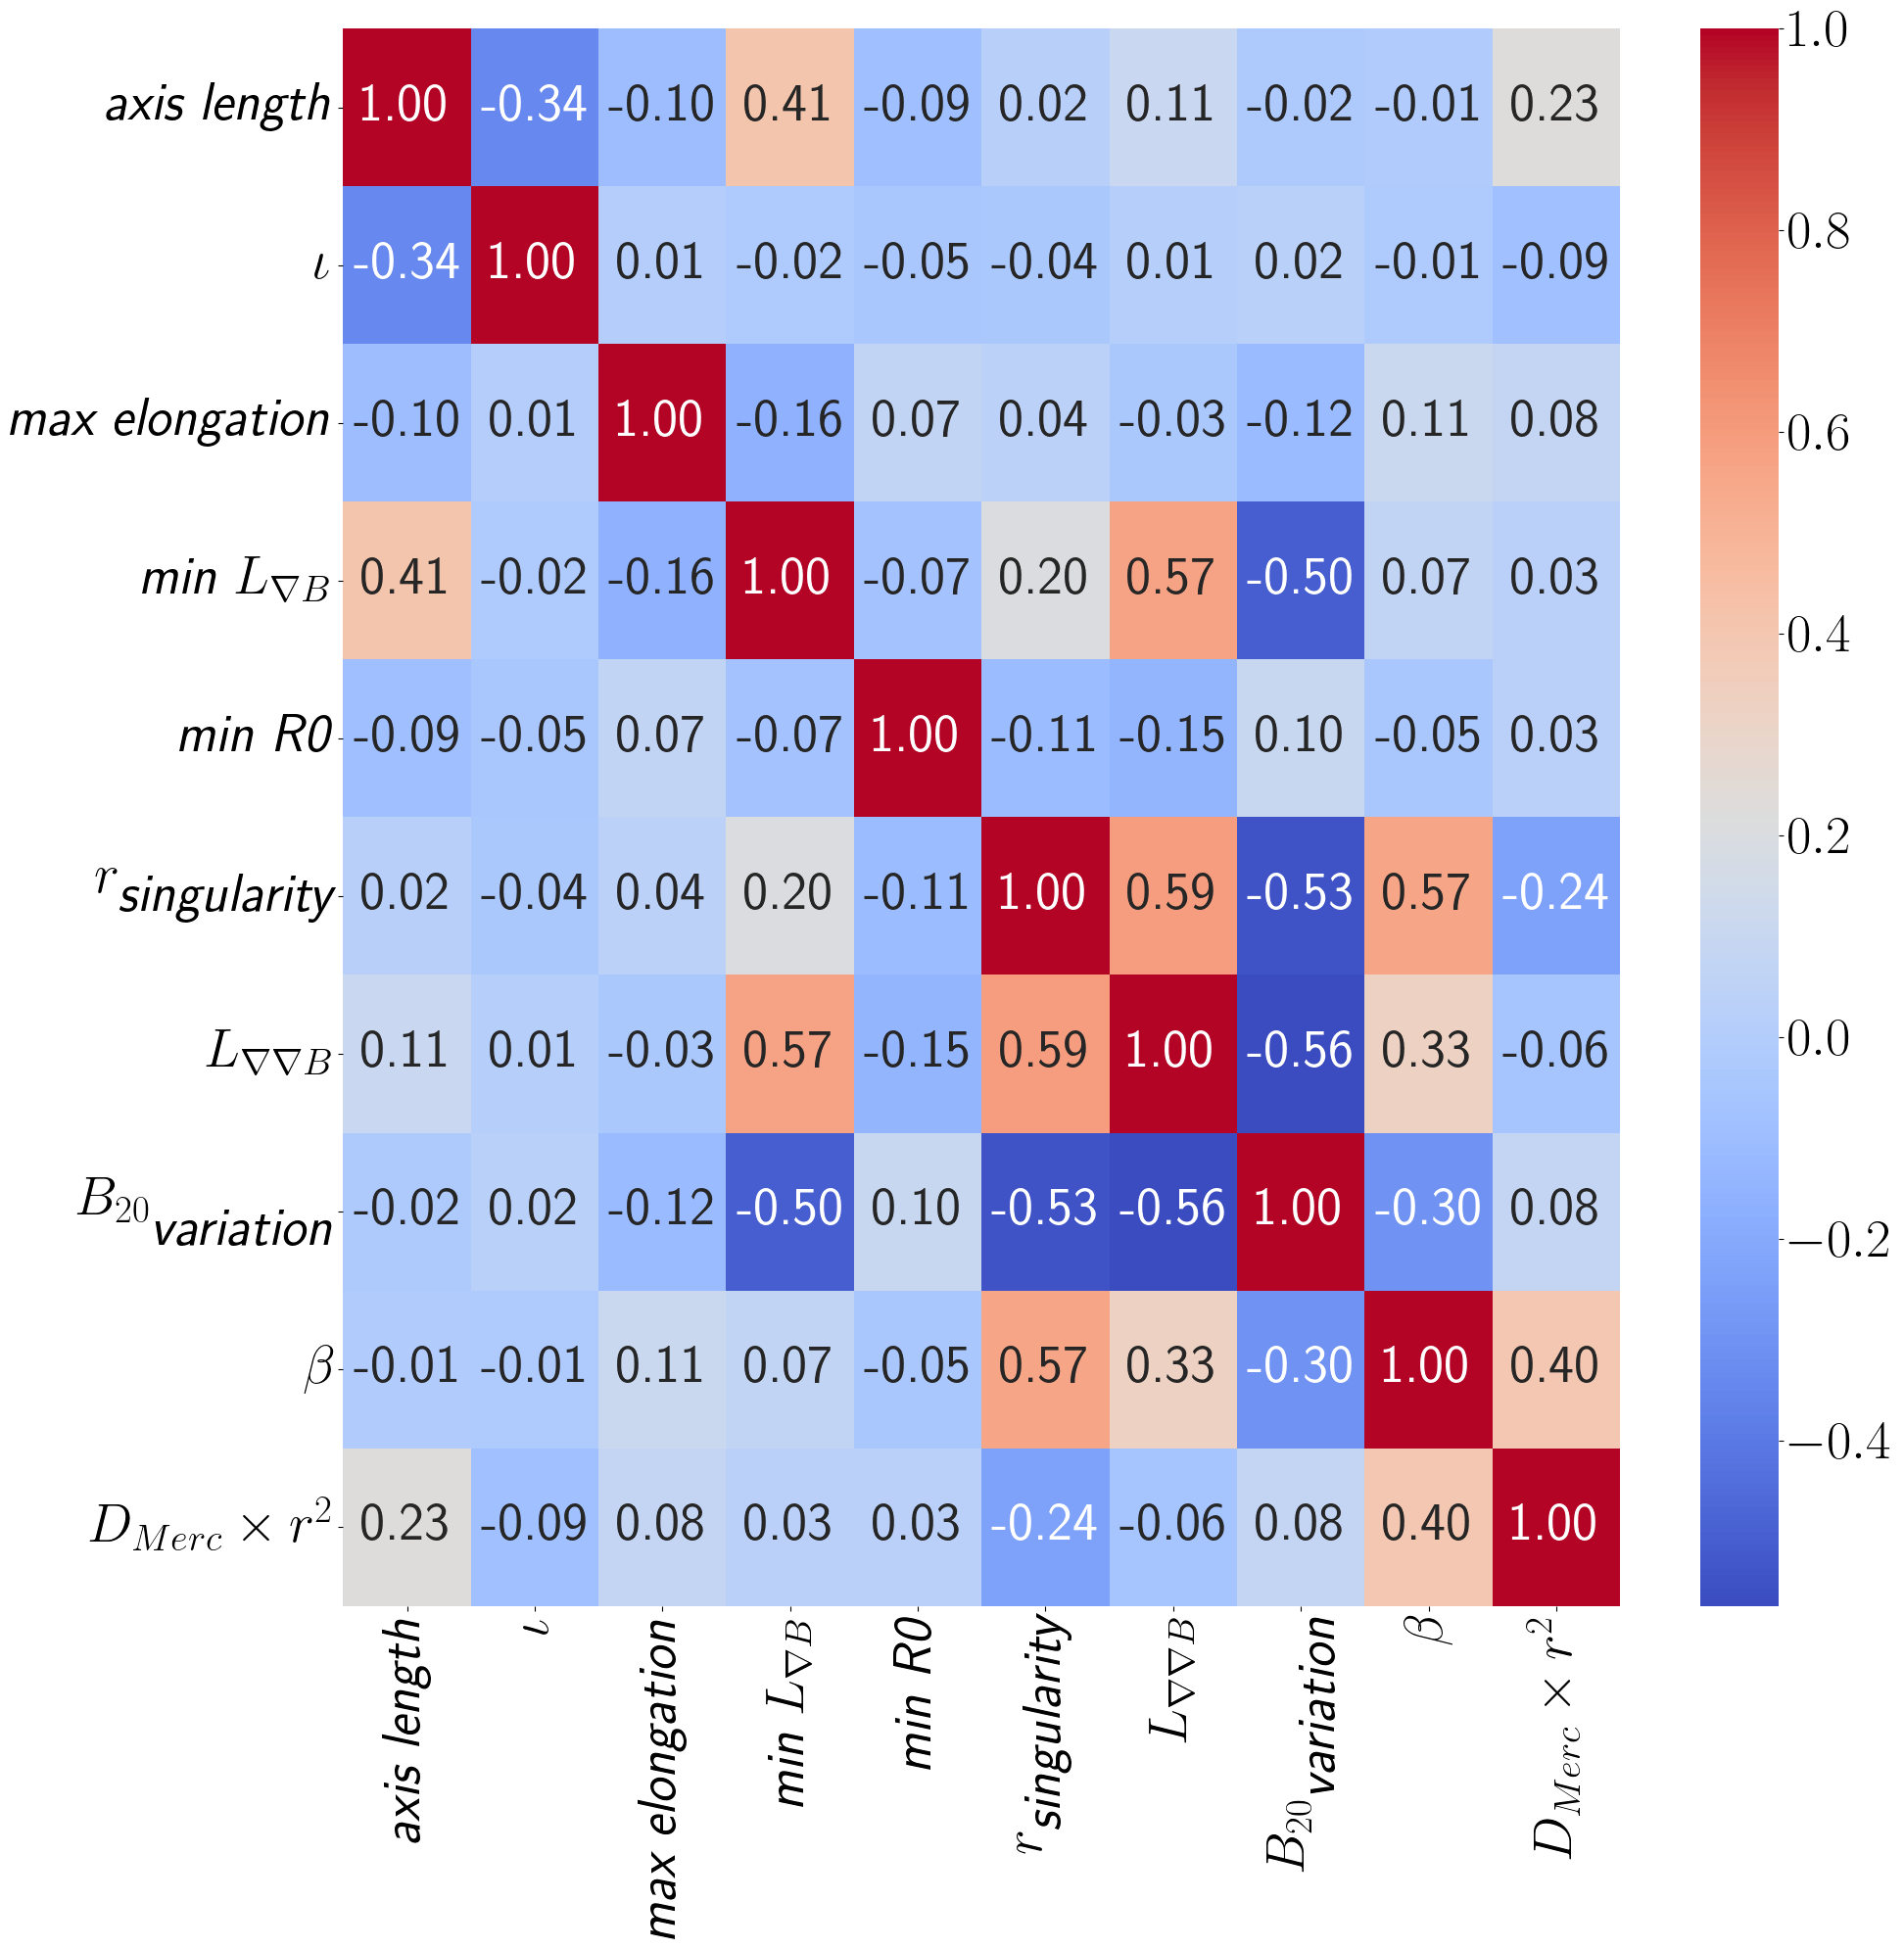

/var/folders/rx/n6c_f5ms1sz_256kqrv5wwrm0000gn/T/ipykernel_18688/2703956224.py:34: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(file)
/var/folders/rx/n6c_f5ms1sz_256kqrv5wwrm0000gn/T/ipykernel_18688/2703956224.py:34: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(file)
/var/folders/rx/n6c_f5ms1sz_256kqrv5wwrm0000gn/T/ipykernel_18688/2703956224.py:34: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(file)
/Users/pedrocurvo/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:170: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "or

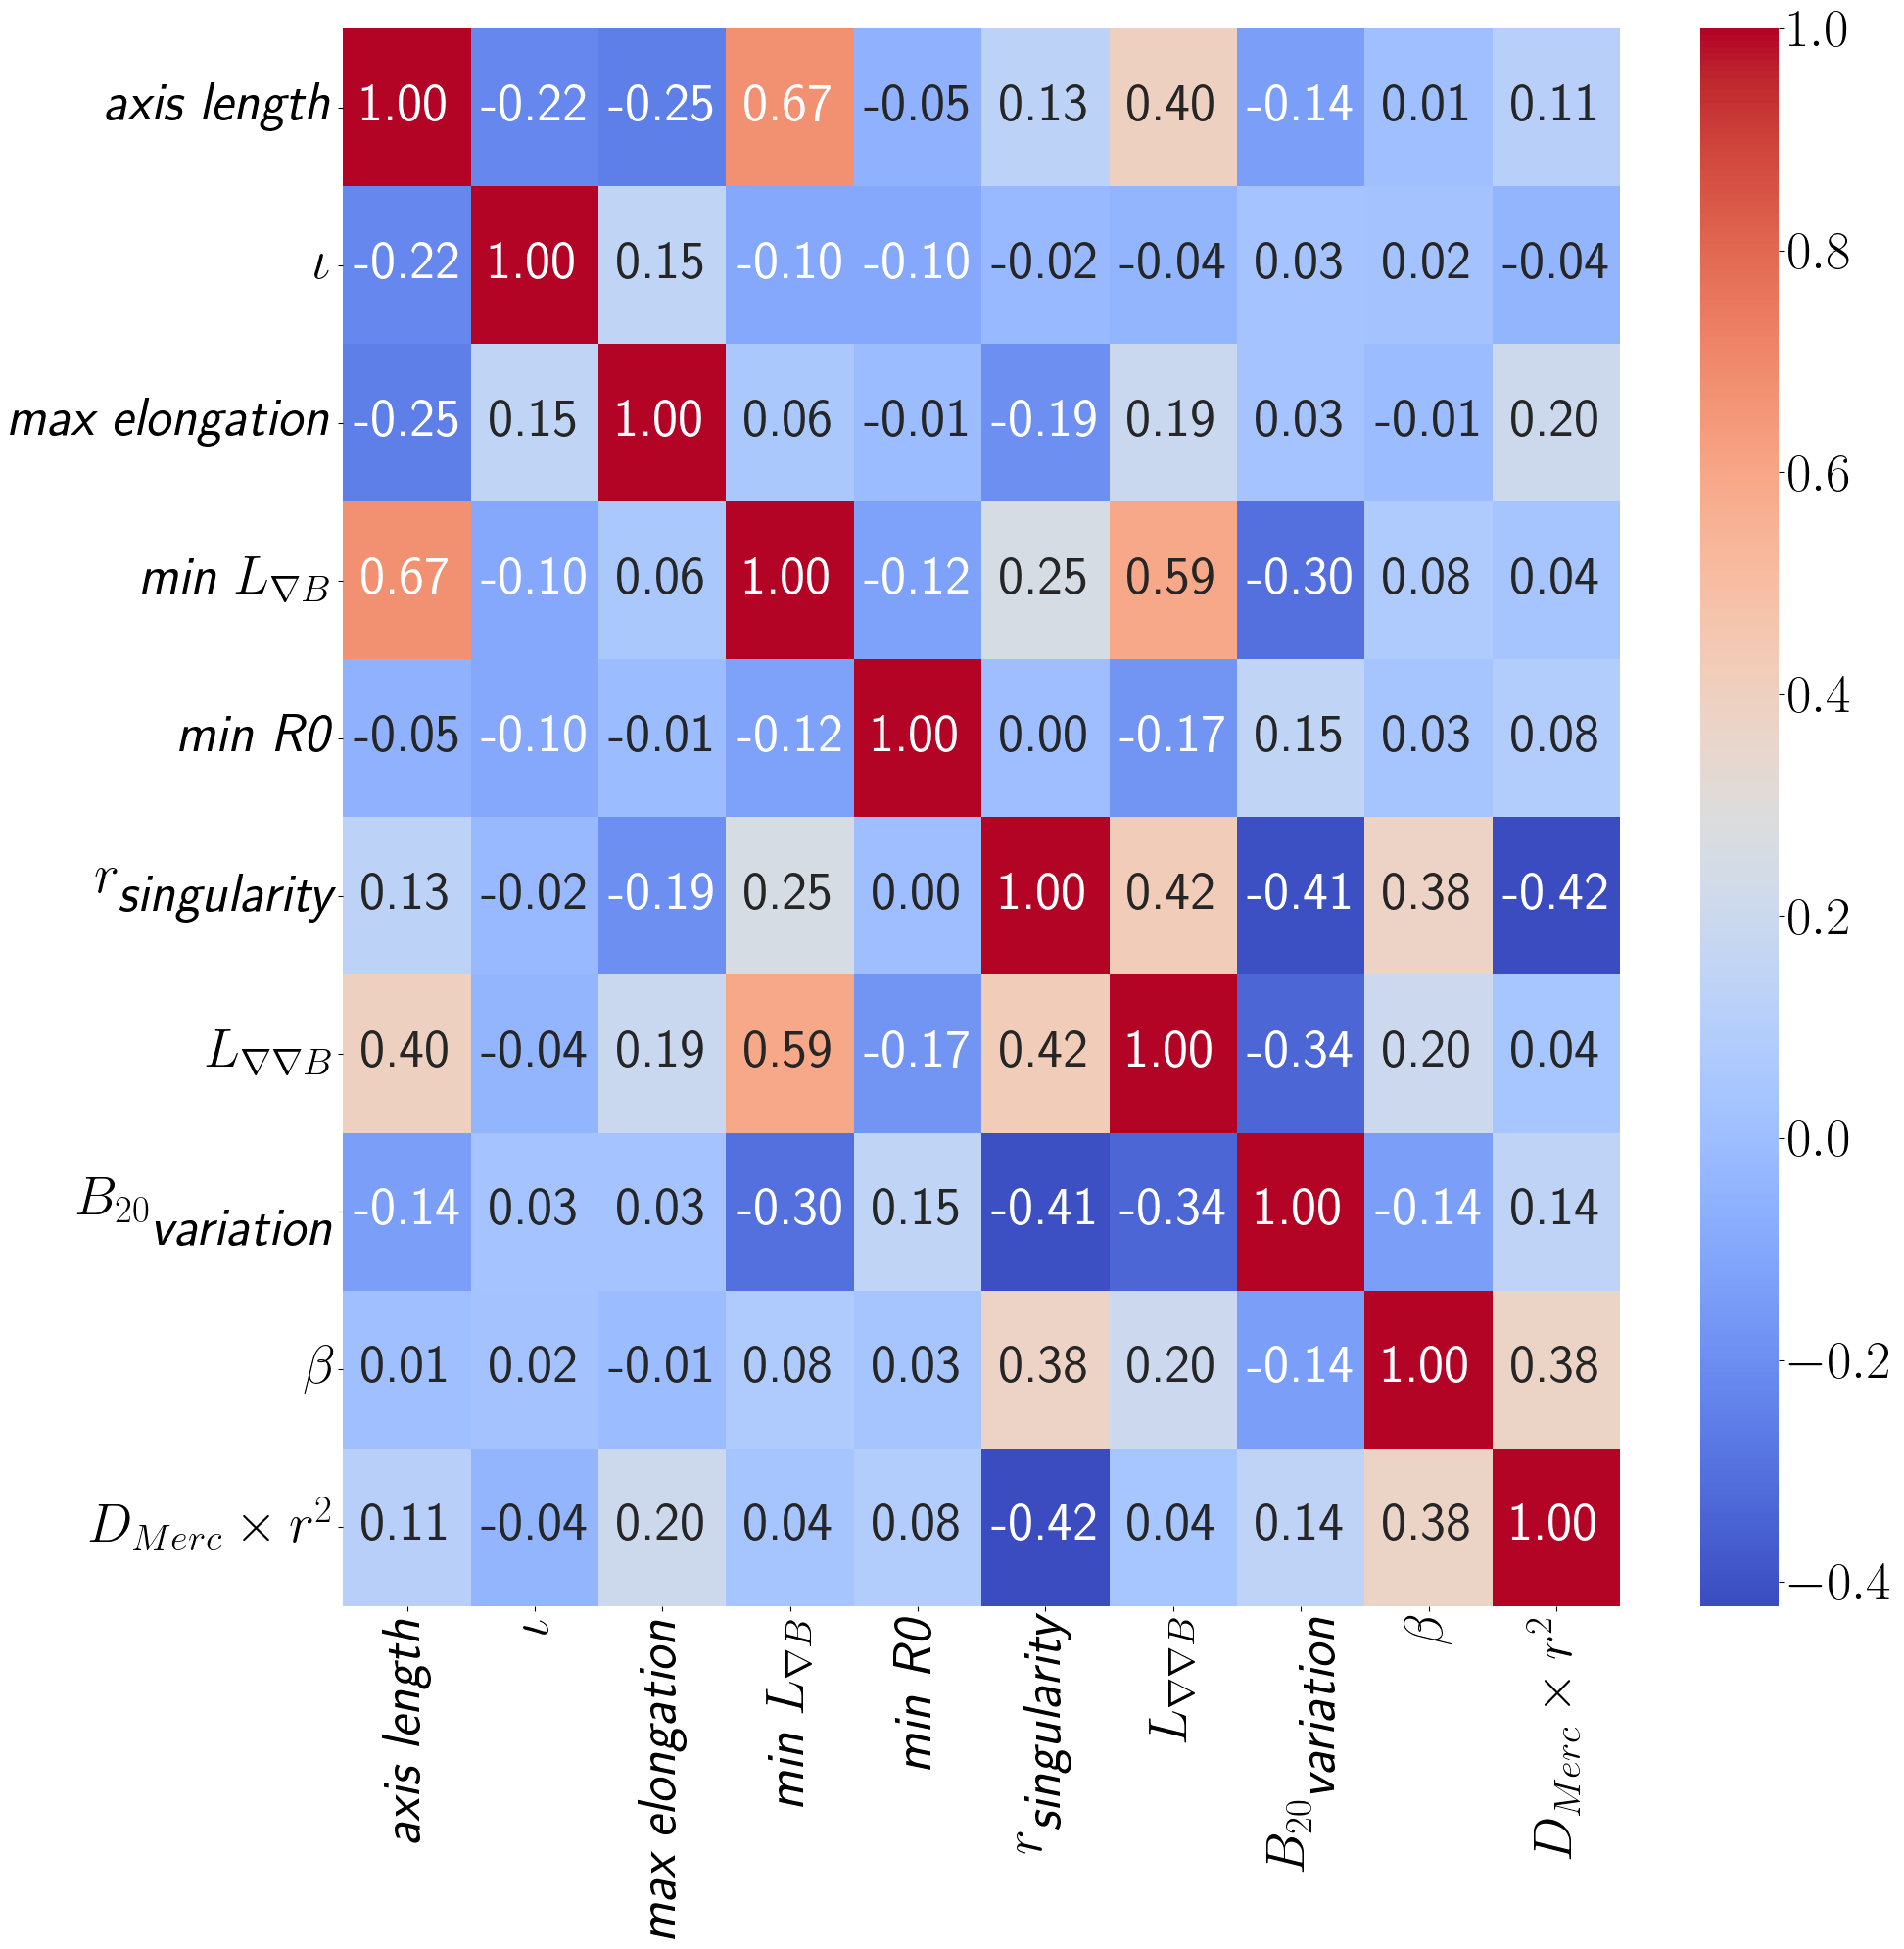

In [36]:
names = ['GStels', 'XGStels']
for i, df in enumerate([df_gstels, df_xgstels]):
    corr = df.corr(method='spearman')

    # I only want to plot the correlation matrix for the last 10 columns
    corr = corr.iloc[-10:, -10:]

    # Plot the correlation matrix
    plt.figure(figsize=(20, 20))
    # I want the annotations to be the names i have for each column in a dictionary
    names_var = {
        'axis_length': r'$\textit{axis length}$',
        'iota': r'$\iota$',
        'max_elongation': r'$\textit{max elongation}$',
        'min_L_grad_B': r'$\textit{min } L_{\nabla B}$',
        'min_R0': r'$\textit{min R0}$',
        'r_singularity': r'$r_{\textit{singularity}}$',
        'L_grad_grad_B': r'$L_{\nabla \nabla B}$',
        'B20_variation': r'$B_{20_{\textit{variation}}}$',
        'beta': r'$\beta$',
        'DMerc_times_r2': r'$D_{Merc} \times r^2$'
    }
    ax = sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', annot_kws={"size": 40}, xticklabels=[names_var[col] for col in corr.columns], yticklabels=[names_var[col] for col in corr.columns])

    # plt.title(f'Correlation Matrix, {names[i]}, Method: Spearman')
    # Increase the font size of the x and y labels
    plt.xticks(fontsize=40, rotation=90)
    plt.yticks(fontsize=40, rotation=0)
    # Adjust the font size of the color bar
    colorbar = ax.collections[0].colorbar
    colorbar.ax.tick_params(labelsize=40)  # Change fontsize as needed
    plt.tight_layout()
    file = images_dir / 'visual_metrics_data' / 'correlations_matrices' / f'{names[i]}.pdf'
    plt.savefig(file)
    plt.show()
    plt.close()


# t-SNE 2D

In [37]:
import os
from sklearn.manifold import TSNE
import plotly.graph_objects as go

### GStels

In [38]:
# Mean and Std
mean = df_gstels.mean()
std = df_gstels.std()

# Normalize the data
df_gstels_norm = (df_gstels - mean) / std

In [39]:
# Sample 10000 points for t-SNE since it is computationally expensive
df_gstels_norm_sample = df_gstels_norm.sample(10000, random_state=42)

In [40]:
tsne = TSNE(n_components=2, perplexity=100, n_iter=1000, n_jobs=os.cpu_count())
principalComponents = tsne.fit_transform(df_gstels_norm_sample)

In [41]:
# Add the principal components to the dataframe
df_gstels_norm_sample['tsne-2d-one'] = principalComponents[:,0]
df_gstels_norm_sample['tsne-2d-two'] = principalComponents[:,1]

In [42]:
# df_gstels_norm_sample with beta above 0.01
df_gstels_norm_sample_beta = df_gstels_norm_sample[df_gstels_norm_sample['beta'] >= (0.01 - mean["beta"])/std["beta"]]

/var/folders/rx/n6c_f5ms1sz_256kqrv5wwrm0000gn/T/ipykernel_18688/1729473425.py:21: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(file)
/var/folders/rx/n6c_f5ms1sz_256kqrv5wwrm0000gn/T/ipykernel_18688/1729473425.py:21: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(file)
/var/folders/rx/n6c_f5ms1sz_256kqrv5wwrm0000gn/T/ipykernel_18688/1729473425.py:21: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(file)
/var/folders/rx/n6c_f5ms1sz_256kqrv5wwrm0000gn/T/ipykernel_18688/1729473425.py:21: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_inches_re

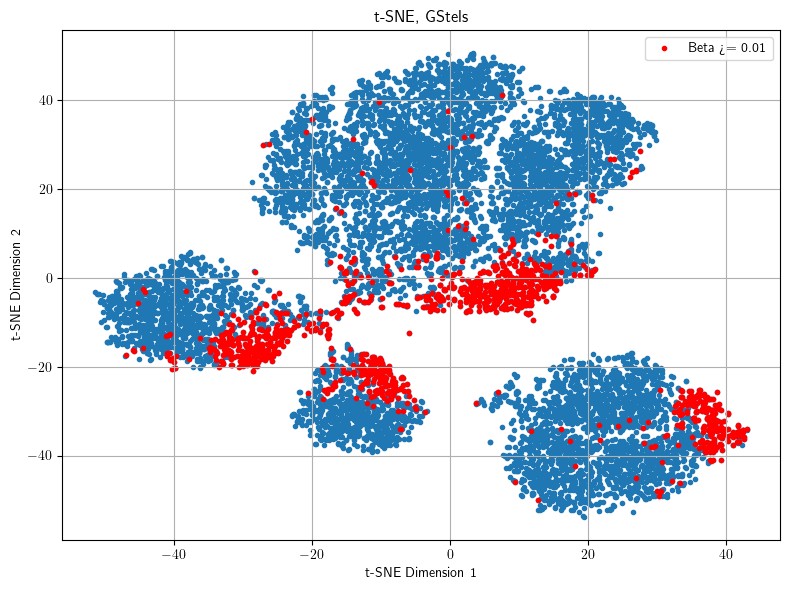

In [43]:
# Plot the t-SNE
plt.figure(figsize=(8, 6))
plt.scatter(df_gstels_norm_sample['tsne-2d-one'],
            df_gstels_norm_sample['tsne-2d-two'],
            marker='.')
plt.scatter(df_gstels_norm_sample_beta['tsne-2d-one'],
            df_gstels_norm_sample_beta['tsne-2d-two'],
            marker='.',
            color='red',
            label='Beta >= 0.01')

plt.title('t-SNE, GStels')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.grid(True)
plt.legend()
plt.tight_layout()

# Save the plot as an image file
file = images_dir / 'visual_metrics_data' / 't-SNE-2d' / 'GStels.png'
plt.savefig(file)

# Show the plot (optional)
plt.show()

### XGStels

In [44]:
# Mean and Std
mean = df_xgstels.mean()
std = df_xgstels.std()

# Normalize the data
df_xgstels_norm = (df_xgstels - mean) / std

In [45]:
# Sample 10000 points for t-SNE since it is computationally expensive
df_xgstels_norm_sample = df_xgstels_norm.sample(10000, random_state=42)

In [46]:
tsne = TSNE(n_components=2, perplexity=100, n_iter=1000, n_jobs=os.cpu_count())
principalComponents = tsne.fit_transform(df_xgstels_norm_sample)

In [47]:
# Add the principal components to the dataframe
df_xgstels_norm_sample['tsne-2d-one'] = principalComponents[:,0]
df_xgstels_norm_sample['tsne-2d-two'] = principalComponents[:,1]

In [48]:
# df_xgstels_norm_sample with beta above 0.01
df_xgstels_norm_sample_beta = df_xgstels_norm_sample[df_xgstels_norm_sample['beta'] >= (0.01 - mean["beta"])/std["beta"]]

/var/folders/rx/n6c_f5ms1sz_256kqrv5wwrm0000gn/T/ipykernel_18688/3575107904.py:21: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(file)
/var/folders/rx/n6c_f5ms1sz_256kqrv5wwrm0000gn/T/ipykernel_18688/3575107904.py:21: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(file)
/var/folders/rx/n6c_f5ms1sz_256kqrv5wwrm0000gn/T/ipykernel_18688/3575107904.py:21: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(file)
/var/folders/rx/n6c_f5ms1sz_256kqrv5wwrm0000gn/T/ipykernel_18688/3575107904.py:21: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_inches_re

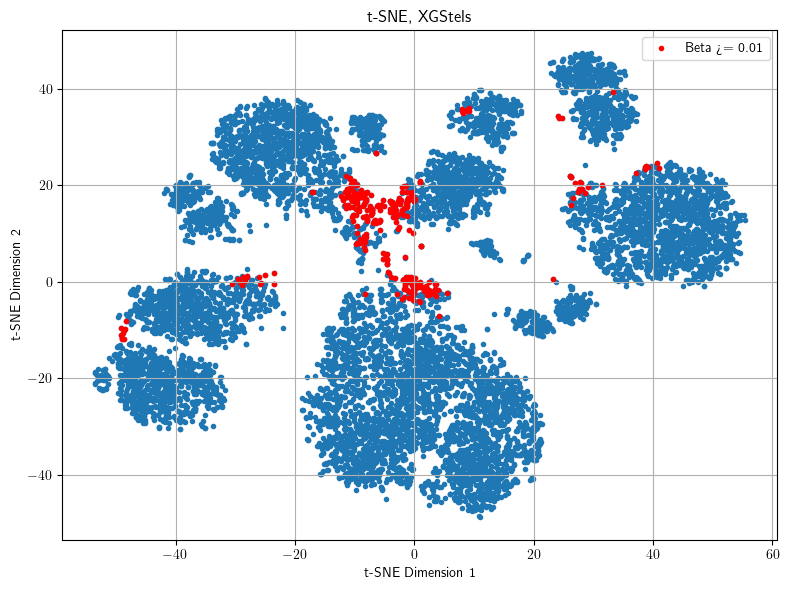

In [49]:
# Plot the t-SNE
plt.figure(figsize=(8, 6))
plt.scatter(df_xgstels_norm_sample['tsne-2d-one'],
            df_xgstels_norm_sample['tsne-2d-two'],
            marker='.')
plt.scatter(df_xgstels_norm_sample_beta['tsne-2d-one'],
            df_xgstels_norm_sample_beta['tsne-2d-two'],
            marker='.',
            color='red',
            label='Beta >= 0.01')

plt.title('t-SNE, XGStels')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.grid(True)
plt.legend()
plt.tight_layout()

# Save the plot as an image file
file = images_dir / 'visual_metrics_data' / 't-SNE-2d' / 'XGStels.png'
plt.savefig(file)

# Show the plot (optional)
plt.show()

# t-SNE 3D

### GStels

In [50]:
# Mean and Std
mean = df_gstels.mean()
std = df_gstels.std()

# Normalize the data
df_gstels_norm = (df_gstels - mean) / std

In [51]:
# Sample 10000 points for t-SNE since it is computationally expensive
df_gstels_norm_sample = df_gstels_norm.sample(10000, random_state=42)

In [52]:
tsne = TSNE(n_components=3, perplexity=100, n_iter=1000, n_jobs=os.cpu_count())
principalComponents = tsne.fit_transform(df_gstels_norm_sample)

In [53]:
# Add the principal components to the dataframe
df_gstels_norm_sample['tsne-3d-one'] = principalComponents[:,0]
df_gstels_norm_sample['tsne-3d-two'] = principalComponents[:,1]
df_gstels_norm_sample['tsne-3d-three'] = principalComponents[:,2]

In [54]:
# df_gstels_norm_sample with beta above 0.01
df_gstels_norm_sample_beta = df_gstels_norm_sample[df_gstels_norm_sample['beta'] >= (0.01 - mean["beta"])/std["beta"]]

In [55]:
fig = go.Figure()
fig.add_trace(go.Scatter3d(
    x=df_gstels_norm_sample['tsne-3d-one'], 
    y=df_gstels_norm_sample['tsne-3d-two'], 
    z=df_gstels_norm_sample['tsne-3d-three'], 
    mode='markers',
    name='name',
    marker=dict(
        size=5,
        opacity=0.5
    )
))
fig.add_trace(go.Scatter3d(
    x=df_gstels_norm_sample_beta['tsne-3d-one'], 
    y=df_gstels_norm_sample_beta['tsne-3d-two'], 
    z=df_gstels_norm_sample_beta['tsne-3d-three'], 
    mode='markers',
    name='name',
    marker=dict(
        size=5,
        opacity=0.5,
        color='red'
    )
))

# Create layout
layout = go.Layout(
    title='t-SNE in 3D, GStels',
    scene=dict(
        xaxis=dict(title='tsne-3d-one'),
        yaxis=dict(title='tsne-3d-two'),
        zaxis=dict(title='tsne-3d-three')
    )
)

# Combine traces and layout into a figure
fig.update_layout(layout)

### XGStels

In [56]:
# Mean and Std
mean = df_xgstels.mean()
std = df_xgstels.std()

# Normalize the data
df_xgstels_norm = (df_xgstels - mean) / std

In [57]:
# Sample 10000 points for t-SNE since it is computationally expensive
df_xgstels_norm_sample = df_xgstels_norm.sample(10000, random_state=42)

In [58]:
tsne = TSNE(n_components=3, perplexity=100, n_iter=1000, n_jobs=os.cpu_count())
principalComponents = tsne.fit_transform(df_xgstels_norm_sample)

In [59]:
# Add the principal components to the dataframe
df_xgstels_norm_sample['tsne-3d-one'] = principalComponents[:,0]
df_xgstels_norm_sample['tsne-3d-two'] = principalComponents[:,1]
df_xgstels_norm_sample['tsne-3d-three'] = principalComponents[:,2]

In [60]:
# df_gstels_norm_sample with beta above 0.01
df_xgstels_norm_sample_beta = df_xgstels_norm_sample[df_xgstels_norm_sample['beta'] >= (0.01 - mean["beta"])/std["beta"]]

In [61]:
fig = go.Figure()
fig.add_trace(go.Scatter3d(
    x=df_xgstels_norm_sample['tsne-3d-one'], 
    y=df_xgstels_norm_sample['tsne-3d-two'], 
    z=df_xgstels_norm_sample['tsne-3d-three'], 
    mode='markers',
    name='name',
    marker=dict(
        size=5,
        opacity=0.5
    )
))
fig.add_trace(go.Scatter3d(
    x=df_xgstels_norm_sample_beta['tsne-3d-one'], 
    y=df_xgstels_norm_sample_beta['tsne-3d-two'], 
    z=df_xgstels_norm_sample_beta['tsne-3d-three'], 
    mode='markers',
    name='name',
    marker=dict(
        size=5,
        opacity=0.5,
        color='red'
    )
))

# Create layout
layout = go.Layout(
    title='t-SNE in 3D, XGStels',
    scene=dict(
        xaxis=dict(title='tsne-3d-one'),
        yaxis=dict(title='tsne-3d-two'),
        zaxis=dict(title='tsne-3d-three')
    )
)

# Combine traces and layout into a figure
fig.update_layout(layout)